# Tesla Stock Price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

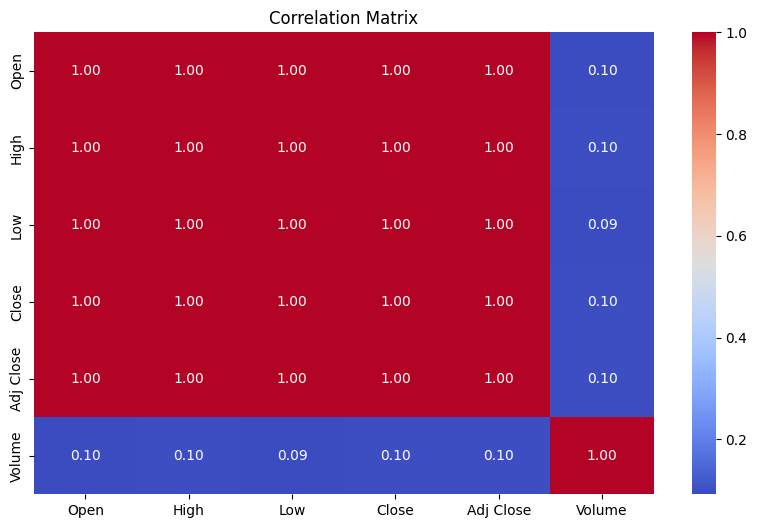

In [2]:
dataset = pd.read_csv("TESLA.csv")

correlation_matrix = dataset[['Open', 'High', 'Low', 'Close', 'Adj Close','Volume']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [3]:
training_set = dataset[['Open', 'High', 'Low', 'Close', 'Adj Close']].values

## Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training = scaler.fit_transform(training_set)

## Creating TimeSteps

In [5]:
X_train = []
y_train = []

for i in range(90, len(dataset)):
    X_train.append(scaled_training[i-90:i,:])
    y_train.append(scaled_training[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)

### Reshaping X_train for RNN model


In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 5))

## Building RNN


### Importing Libraries

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising RNN

In [8]:
regressor = Sequential()

### Adding First Layer

In [9]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding Layers


In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding Output Layer


In [13]:
regressor.add(Dense(units = 1))

### Compile RNN

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting RNN

In [15]:
regressor.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 28s 197ms/step - loss: 0.0152
Epoch 2/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 42s 207ms/step - loss: 0.0029
Epoch 3/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 20s 184ms/step - loss: 0.0023
Epoch 4/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - loss: 0.0022
Epoch 5/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 41s 197ms/step - loss: 0.0023
Epoch 6/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 42s 208ms/step - loss: 0.0019
Epoch 7/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 42s 219ms/step - loss: 0.0016
Epoch 8/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 27s 241ms/step - loss: 0.0017
Epoch 9/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 36s 194ms/step - loss: 0.0015
Epoch 10/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 41s 198ms/step - loss: 0.0012
Epoch 11/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 20s 182ms/step - loss: 0.0014
Epoch 12/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 23s 201ms/step - loss: 0.0013
Epoch 13/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 41s 198ms/step - loss: 0.0013
Epoch 14/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 21s 185ms/step - loss: 0.0012
Epoch 15/30
111

## Predicting Open Value

In [16]:
!pip install yfinance

### Fetchin Tesla Stock Prices

In [22]:
import yfinance as yf

stock_data = yf.download('TSLA', start='2024-01-01', end='2025-01-01')

print(stock_data["Open"].head())

[*********************100%***********************]  1 of 1 completed

Ticker            TSLA
Date                  
2024-01-02  250.080002
2024-01-03  244.979996
2024-01-04  239.250000
2024-01-05  236.860001
2024-01-08  236.139999


### Preparing Real Tesla Stock Prices

In [19]:
all_scaled_prices = scaler.transform(stock_data[['Open', 'High', 'Low', 'Close', 'Adj Close']].values)

real_scaled_prices = all_scaled_prices[:,:5]
X_real = []
for i in range(90, len(real_scaled_prices)):
    X_real.append(real_scaled_prices[i-90:i])

X_real = np.array(X_real)

real_scaled_prices = all_scaled_prices[:,:5]

predicted_stock_price = regressor.predict(X_real)

predicted_stock_price = np.reshape(predicted_stock_price, (predicted_stock_price.shape[0], 1))

predicted_stock_price = scaler.inverse_transform(np.hstack((predicted_stock_price,
                                                             np.zeros((predicted_stock_price.shape[0], scaled_training.shape[1] - 1)))))

print(predicted_stock_price[-10:])

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step
[[421.66105602   1.10866702   0.998667     1.05333304   1.05333304]
 [434.83199721   1.10866702   0.998667     1.05333304   1.05333304]
 [432.11873998   1.10866702   0.998667     1.05333304   1.05333304]
 [425.94189688   1.10866702   0.998667     1.05333304   1.05333304]
 [418.94784771   1.10866702   0.998667     1.05333304   1.05333304]
 [416.75767282   1.10866702   0.998667     1.05333304   1.05333304]
 [425.90730848   1.10866702   0.998667     1.05333304   1.05333304]
 [432.13561834   1.10866702   0.998667     1.05333304   1.05333304]
 [427.18526927   1.10866702   0.998667     1.05333304   1.05333304]
 [417.79053049   1.10866702   0.998667     1.05333304   1.05333304]]


### Visualizaiton of Predicted and Real Stocks

Real prices shape: (162, 1)
Predicted prices shape: (162,)


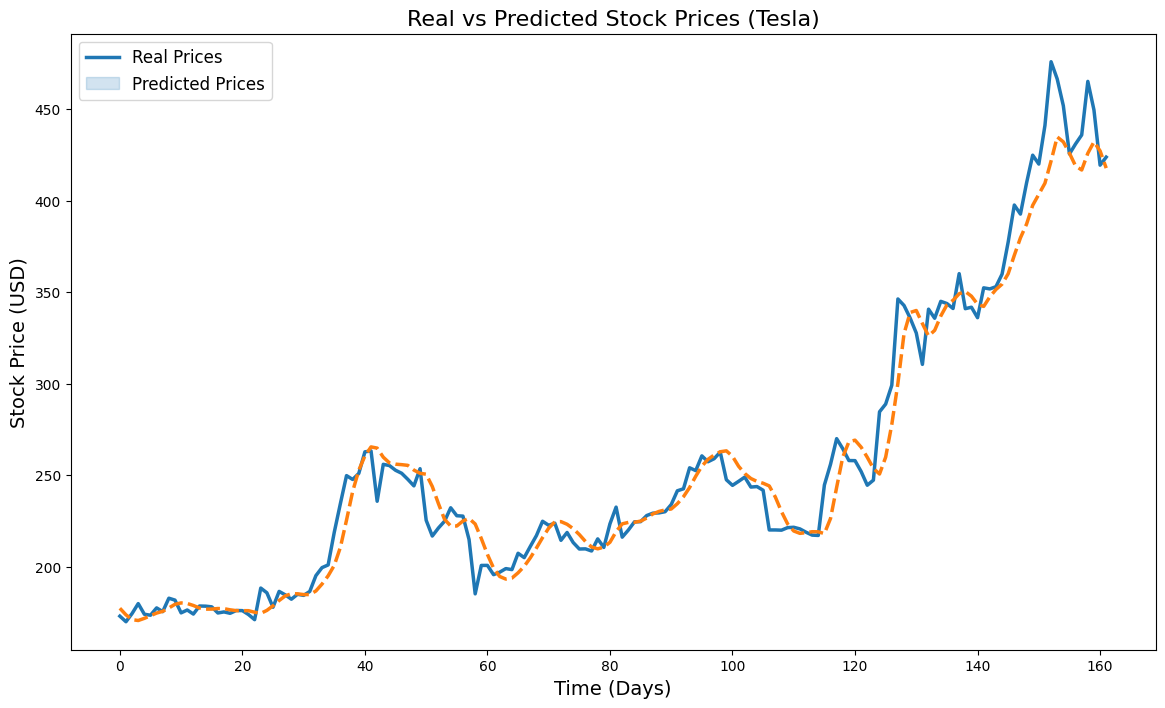

In [21]:
real_prices = stock_data['Open'].values[90:]
predicted_prices = predicted_stock_price[:, 0]

print(f"Real prices shape: {real_prices.shape}")
print(f"Predicted prices shape: {predicted_prices.shape}")

visualization_df = pd.DataFrame({
    "Real Prices": real_prices.flatten(),
    "Predicted Prices": predicted_prices.flatten()
})

plt.figure(figsize=(14, 8))
sns.lineplot(data=visualization_df, linewidth=2.5)
plt.title("Real vs Predicted Stock Prices (Tesla)", fontsize=16)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Stock Price (USD)", fontsize=14)
plt.legend(labels=["Real Prices", "Predicted Prices"], fontsize=12)
plt.show()
